In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

e:\RUSHIL\Courses\Agentic_AI\AI_Engineer_Core\ai-pricer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
# Random forest model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor

documents = [item.summary for item in train_ds]
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
model = RandomForestRegressor(n_estimators=50)

x_train = vectorizer.fit_transform(documents)
y_train = np.array([float(item.price) for item in train_ds])
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [4]:
from models.item import Item


def random_forest_regression(item: Item) -> float:
    summary = item.summary
    x = vectorizer.transform([summary])
    y = (model.predict(x))[0]
    return max(0, float(y))

1: Guess: $26.09 Truth: $35.00 Error: $8.91 SLE: 0.08 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $27.78 Truth: $25.00 Error: $2.78 SLE: 0.01 Item: Omaha Steaks Gift Card
3: Guess: $84.92 Truth: $285.00 Error: $200.08 SLE: 1.45 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $11.60 Truth: $4.88 Error: $6.72 SLE: 0.58 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $13.93 Truth: $5.00 Error: $8.93 SLE: 0.83 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $9.88 Truth: $16.99 Error: $7.11 SLE: 0.25 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $99.20 Truth: $84.99 Error: $14.21 SLE: 0.02 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
8: Guess: $27.87 Truth: $18.99 Error: $8.88 SLE: 0.14 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $78.31 Truth: $22.08 Error: $56.23 SLE: 1.52 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess: $38.11 Truth: $39.98 Error: $1.87 SLE: 0.00 Item: LOVEVOOK Laptop Backpack for 

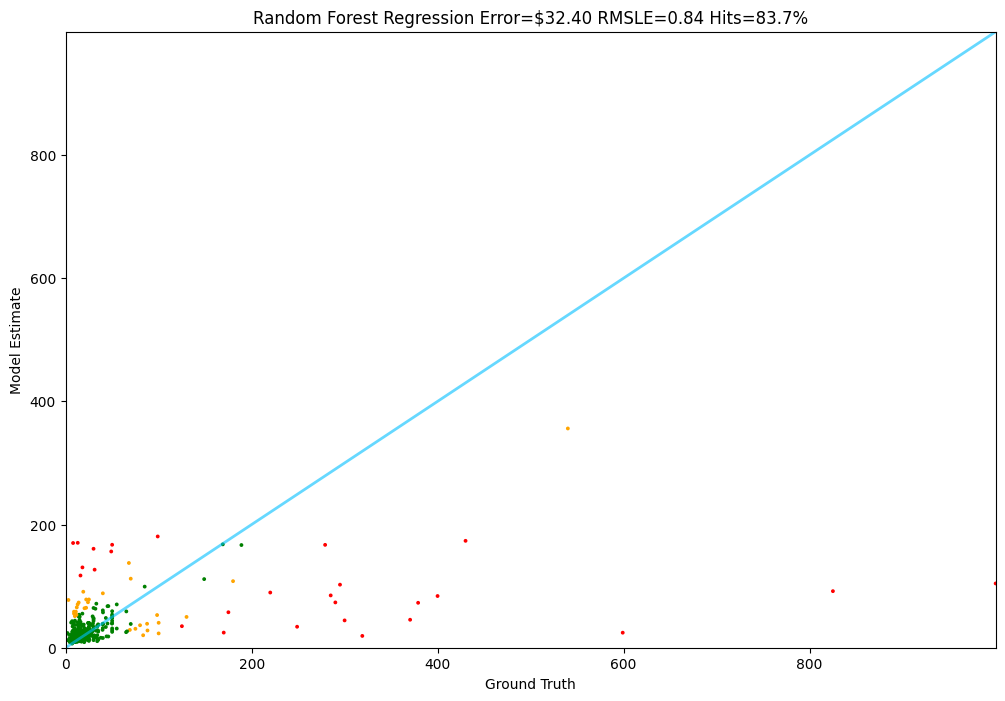

In [5]:
Tester.test(random_forest_regression)